In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import heapq
import time

In [ ]:
# Grid definition
grid = np.array([
    [0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2],
    [0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 2],
    [0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [3, 0, 0, 1, 1, 0, 2, 1, 0, 0, 4],
    [0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2],
    [0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0],
    [0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
])

In [ ]:
# Utility function to get valid neighbors of a given position on the grid
def get_neighbors(pos, grid):
    directions = [(-1,0), (1,0), (0,-1), (0,1)]  # Possible movement directions (up, down, left, right)
    x, y = pos  # Unpack the current position
    for dx, dy in directions:  # Iterate through all possible directions
        nx, ny = x + dx, y + dy  # Calculate new position by moving in the current direction
        # Check if the new position is within bounds and not a wall (represented by 1)
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1]:
            if grid[nx, ny] != 1:  # If it's not a wall
                yield (nx, ny)  # Yield the valid neighbor position


In [ ]:
# Function to reconstruct the path from start to goal using the 'came_from' dictionary
def reconstruct_path(came_from, start, goal):
    path = []  # Initialize an empty list to store the reconstructed path
    node = goal  # Start from the goal node
    while node != start:  # Traverse back from the goal to the start
        path.append(node)  # Add the current node to the path
        node = came_from.get(node)  # Get the previous node in the path
        if node is None:  # If there's no valid previous node (path doesn't exist)
            return [], set()  # Return an empty path and an empty set
    path.append(start)  # Add the start node to the path
    return path[::-1], set(came_from.keys())  # Return the reversed path and the set of visited nodes


In [ ]:
# Function to visualize the grid, path, and explored nodes during pathfinding
def draw_grid(grid, path=[], explored=set(), algo_name=""):
    # Define the color mapping for different cell values
    color_map = {
        0: 'white',    # Empty space
        1: 'black',    # Obstacle
        2: 'deepskyblue',  # Explored nodes
        3: 'green',    # Start point
        4: 'red'       # Goal point
    }

    # Create a plot for the grid
    fig, ax = plt.subplots(figsize=(grid.shape[1] * 0.5, grid.shape[0] * 0.5))
    ax.set_xticks(np.arange(-0.5, grid.shape[1], 1))  # Set x-axis ticks
    ax.set_yticks(np.arange(-0.5, grid.shape[0], 1))  # Set y-axis ticks
    ax.set_xticklabels([])  # Hide x-axis labels
    ax.set_yticklabels([])  # Hide y-axis labels
    ax.grid(True)  # Enable grid

    # Loop through the grid and add rectangles for each cell
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            cell = grid[i, j]
            ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, color=color_map[cell]))  # Add a colored rectangle for each cell

    # Highlight explored nodes with a light gray color
    for (x, y) in explored:
        ax.add_patch(plt.Rectangle((y-0.5, x-0.5), 1, 1, color='lightgray', alpha=0.5))

    # If a path is provided, plot the path in gold with circular markers
    if path:
        y_coords, x_coords = zip(*path)
        ax.plot(x_coords, y_coords, color='gold', linewidth=2, marker='o')

    # Highlight the start and goal points with green and red borders, respectively
    start = tuple(np.argwhere(grid == 3)[0])  # Find the start position (value = 3)
    goal = tuple(np.argwhere(grid == 4)[0])   # Find the goal position (value = 4)
    ax.add_patch(plt.Rectangle((start[1]-0.5, start[0]-0.5), 1, 1, edgecolor='green', linewidth=2, fill=False))  # Start
    ax.add_patch(plt.Rectangle((goal[1]-0.5, goal[0]-0.5), 1, 1, edgecolor='red', linewidth=2, fill=False))    # Goal

    # Set the plot limits
    ax.set_xlim(-0.5, grid.shape[1]-0.5)
    ax.set_ylim(grid.shape[0]-0.5, -0.5)
    plt.title(f"{algo_name} - Pathfinding Visualization")  # Set title with algorithm name
    plt.tight_layout()  # Adjust layout to fit everything nicely
    plt.show()  # Display the plot


In [ ]:
# Algorithms
def dfs(grid):
    start = tuple(np.argwhere(grid == 3)[0])
    goal = tuple(np.argwhere(grid == 4)[0])
    stack = [start]
    visited = set()
    came_from = {}

    while stack:
        current = stack.pop()
        if current in visited:
            continue
        visited.add(current)
        if current == goal:
            break
        for neighbor in get_neighbors(current, grid):
            if neighbor not in visited:
                came_from[neighbor] = current
                stack.append(neighbor)
    return reconstruct_path(came_from, start, goal)


In [ ]:
# Breadth-First Search (BFS) algorithm to find the shortest path from start to goal
def bfs(grid):
    # Find the coordinates of the start and goal positions
    start = tuple(np.argwhere(grid == 3)[0])  # Start position (value = 3)
    goal = tuple(np.argwhere(grid == 4)[0])   # Goal position (value = 4)

    # Initialize the queue with the start position, a visited set, and a dictionary to track the path
    queue = deque([start])
    visited = set()  # Set to track visited nodes
    came_from = {}   # Dictionary to track the path (parent node of each node)

    # BFS loop to explore the grid
    while queue:
        current = queue.popleft()  # Get the next node from the queue
        if current in visited:     # Skip nodes that have already been visited
            continue
        visited.add(current)  # Mark the current node as visited

        # If the goal is reached, break out of the loop
        if current == goal:
            break

        # Explore all neighbors of the current node
        for neighbor in get_neighbors(current, grid):
            # If the neighbor hasn't been visited and is not already in the queue, add it
            if neighbor not in visited and neighbor not in queue:
                came_from[neighbor] = current  # Track where the neighbor came from
                queue.append(neighbor)  # Add the neighbor to the queue

    # Reconstruct and return the path from start to goal
    return reconstruct_path(came_from, start, goal)


In [ ]:
# Heuristic function for estimating the cost from node a to node b (Manhattan distance)
def heuristic(a, b):
    # Calculate the absolute difference in the x and y coordinates (Manhattan distance)
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


In [ ]:
# A* (A-star) pathfinding algorithm
def a_star(grid):
    # Get the start and goal positions from the grid
    start = tuple(np.argwhere(grid == 3)[0])
    goal = tuple(np.argwhere(grid == 4)[0])

    # Open set: list of nodes to be evaluated, prioritized by f-score
    open_set = []
    heapq.heappush(open_set, (0, start))  # Push start node with initial f-score of 0

    came_from = {}  # Dictionary to track the path
    g_score = {start: 0}  # Dictionary to track the cost of getting to each node

    while open_set:
        # Get the node with the lowest f-score from the open set
        _, current = heapq.heappop(open_set)

        # If the current node is the goal, stop the search
        if current == goal:
            break

        # Check each neighboring node
        for neighbor in get_neighbors(current, grid):
            tentative_g = g_score[current] + 1  # Tentative g-score (cost to reach the neighbor)

            # If the neighbor is not visited or the new path is better
            if neighbor not in g_score or tentative_g < g_score[neighbor]:
                came_from[neighbor] = current  # Track the node that led to this neighbor
                g_score[neighbor] = tentative_g  # Update the g-score
                f_score = tentative_g + heuristic(neighbor, goal)  # Calculate the f-score (g + h)
                heapq.heappush(open_set, (f_score, neighbor))  # Push the neighbor to the open set

    # Reconstruct the path from start to goal using the came_from dictionary
    return reconstruct_path(came_from, start, goal)


In [ ]:
# Forward Checking pathfinding algorithm
def forward_checking(grid):
    # Get the start and goal positions from the grid
    start = tuple(np.argwhere(grid == 3)[0])
    goal = tuple(np.argwhere(grid == 4)[0])

    # Initialize the queue for BFS-like exploration
    queue = deque([start])
    visited = set()  # Set of visited nodes
    came_from = {}  # Dictionary to track the path

    while queue:
        # Dequeue the next node to explore
        current = queue.popleft()

        # Skip if the node has already been visited
        if current in visited:
            continue
        visited.add(current)

        # If the goal node is reached, stop searching
        if current == goal:
            break

        # Explore the neighbors of the current node
        for neighbor in get_neighbors(current, grid):
            # Skip already visited neighbors or blocked cells
            if neighbor not in visited and grid[neighbor] != 1:
                # Perform forward checking: ensure the neighbor's neighbors are not blocked
                if all(grid[nx, ny] != 1 for nx, ny in get_neighbors(neighbor, grid)):
                    came_from[neighbor] = current  # Track the path
                    queue.append(neighbor)  # Add the neighbor to the queue for further exploration

    # Reconstruct the path from start to goal using the came_from dictionary
    return reconstruct_path(came_from, start, goal)


In [ ]:
def plot_heatmap(grid, explored, algo_name=""):
    heatmap = np.zeros_like(grid, dtype=float)
    for x, y in explored:
        heatmap[x, y] = 1.0

    plt.figure(figsize=(6, 6))
    plt.imshow(heatmap, cmap='hot', interpolation='nearest')
    plt.title(f"{algo_name} - Heatmap of Explored Nodes")
    plt.colorbar(label='Exploration Intensity')
    plt.xticks([])
    plt.yticks([])
    plt.show()


In [ ]:
# Function to run a pathfinding algorithm, measure its performance, and visualize the result
def run_and_measure(name, algorithm_fn):
    # Record the start time to measure execution time
    start_time = time.time()

    # Run the algorithm and get the path and explored nodes
    path, explored = algorithm_fn(grid)

    # Calculate the execution time
    exec_time = time.time() - start_time

    # Calculate the cost of the path (number of steps in the path minus 1)
    cost = len(path) - 1 if path else float('inf')

    # Determine if the algorithm guarantees optimality (only BFS and A* are optimal)
    optimal = 'Yes' if name in ['A*', 'BFS'] else 'No'

    # Visualize the grid, path, and explored nodes
    draw_grid(grid, path, explored, algo_name=name)

    # Return the algorithm's name, the number of explored nodes, the path cost,
    # whether the solution is optimal, and the execution time
    return (name, len(explored), cost, optimal, exec_time)


In [ ]:
def plot_comparison(results):
    # Prepare data for the plot
    algorithms = [result[0] for result in results]
    nodes_developed = [result[1] for result in results]
    exec_times = [result[4] for result in results]
    path_lengths = [result[2] for result in results]

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Subplot 1: Nodes Developed
    axs[0].bar(algorithms, nodes_developed, color='skyblue')
    axs[0].set_title("Nodes Developed")
    axs[0].set_ylabel("Number of Nodes")
    axs[0].set_xlabel("Algorithm")

    # Subplot 2: Execution Time
    axs[1].bar(algorithms, exec_times, color='lightgreen')
    axs[1].set_title("Execution Time (s)")
    axs[1].set_ylabel("Seconds")
    axs[1].set_xlabel("Algorithm")

    # Subplot 3: Path Cost
    axs[2].bar(algorithms, path_lengths, color='salmon')
    axs[2].set_title("Path Cost")
    axs[2].set_ylabel("Steps")
    axs[2].set_xlabel("Algorithm")

    plt.suptitle("Comparison of Pathfinding Algorithms", fontsize=16)
    plt.tight_layout()
    plt.show()


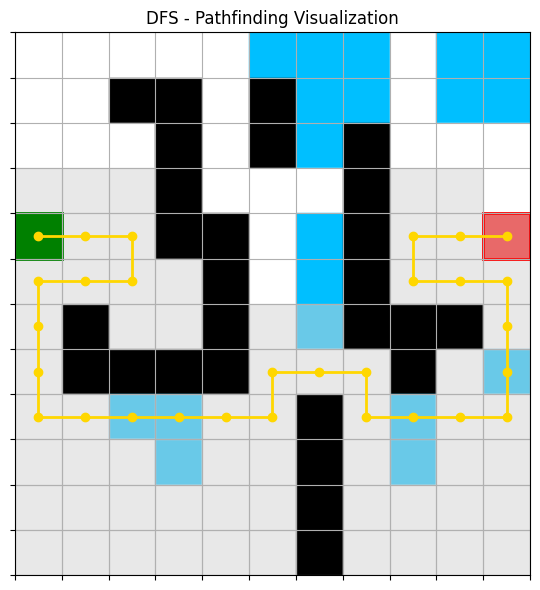

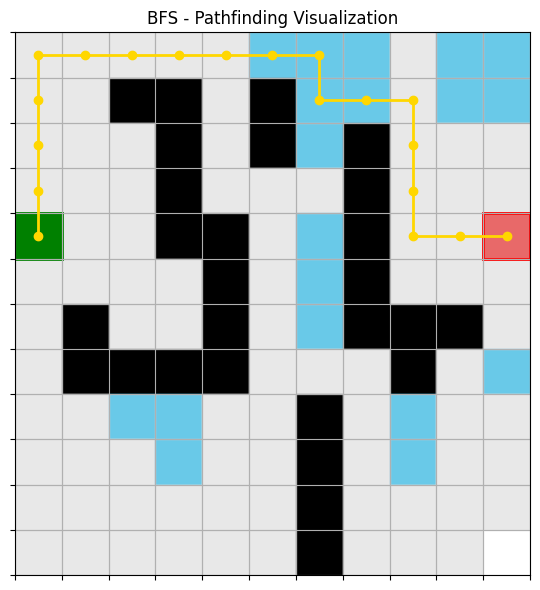

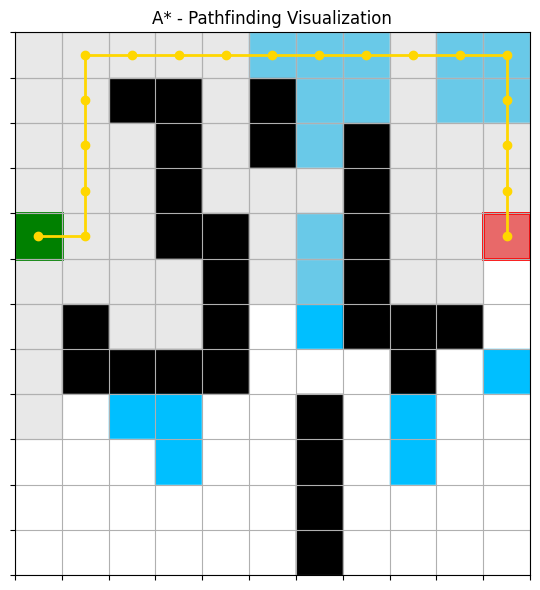

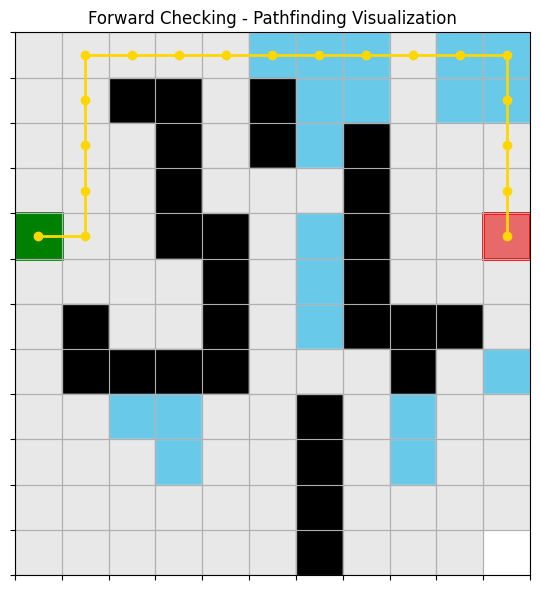

In [ ]:
# Gather results
# Run all algorithms and collect results
results = [
    run_and_measure("DFS", dfs),
    run_and_measure("BFS", bfs),
    run_and_measure("A*", a_star),
    run_and_measure("Forward Checking", forward_checking)
]


# Output function
def display_results(results):
    for name, nodes, cost, optimal, exec_time in results:
        algo_name = {
            'DFS': 'Depth-First Search',
            'BFS': 'Breadth-First Search',
            'A*': 'A-Star Search',
            'Forward Checking': 'Forward Checking'
        }.get(name, name)

        print(f"\n🔵 {name} ({algo_name})")
        print(f"  • Nœuds développés : {nodes}")
        print(f"  • Coût du chemin    : {cost}")
        print(f"  • Chemin optimal    : {'✅ Oui' if optimal == 'Yes' else '❌ Non'}")
        print(f"  • Temps d’exécution : {exec_time:.5f} s")



#desplay heatmap :
#plot_heatmap(grid, explored, algo_name=name)




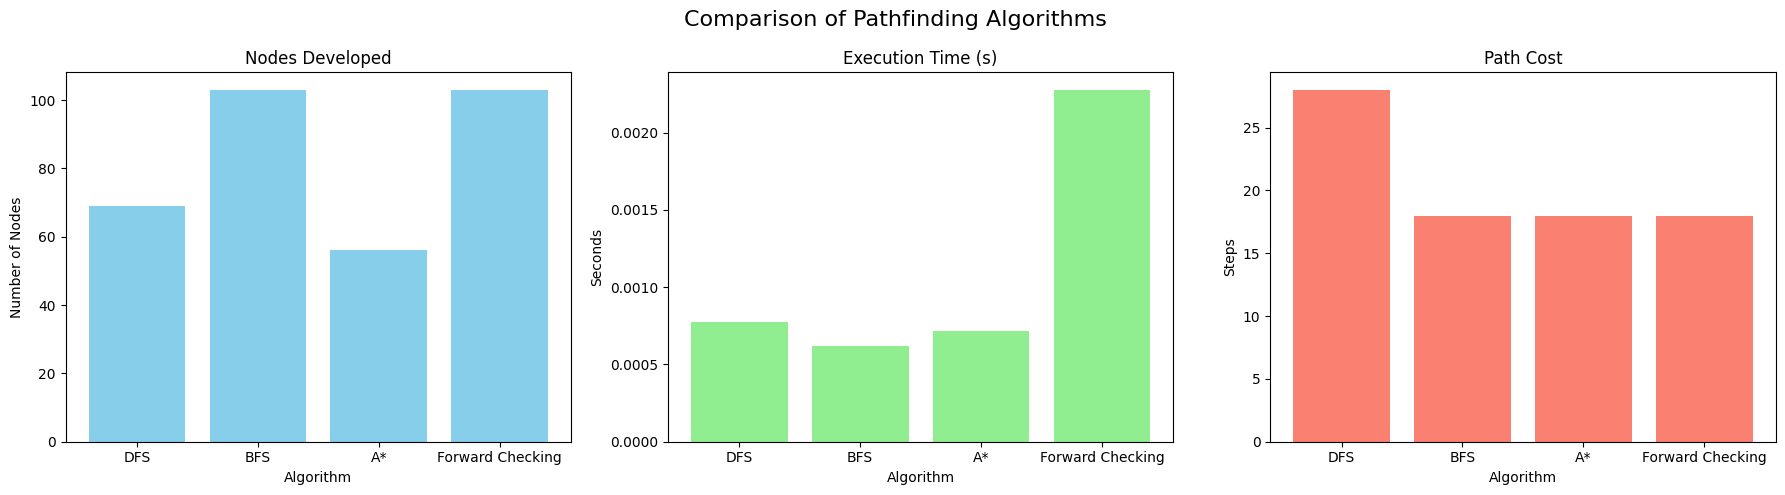

In [ ]:
# Plot comparison graphs
plot_comparison(results)

In [ ]:
# Display results
display_results(results)



🔵 DFS (Depth-First Search)
  • Nœuds développés : 69
  • Coût du chemin    : 28
  • Chemin optimal    : ❌ Non
  • Temps d’exécution : 0.00077 s

🔵 BFS (Breadth-First Search)
  • Nœuds développés : 103
  • Coût du chemin    : 18
  • Chemin optimal    : ✅ Oui
  • Temps d’exécution : 0.00062 s

🔵 A* (A-Star Search)
  • Nœuds développés : 56
  • Coût du chemin    : 18
  • Chemin optimal    : ✅ Oui
  • Temps d’exécution : 0.00072 s

🔵 Forward Checking (Forward Checking)
  • Nœuds développés : 103
  • Coût du chemin    : 18
  • Chemin optimal    : ❌ Non
  • Temps d’exécution : 0.00228 s


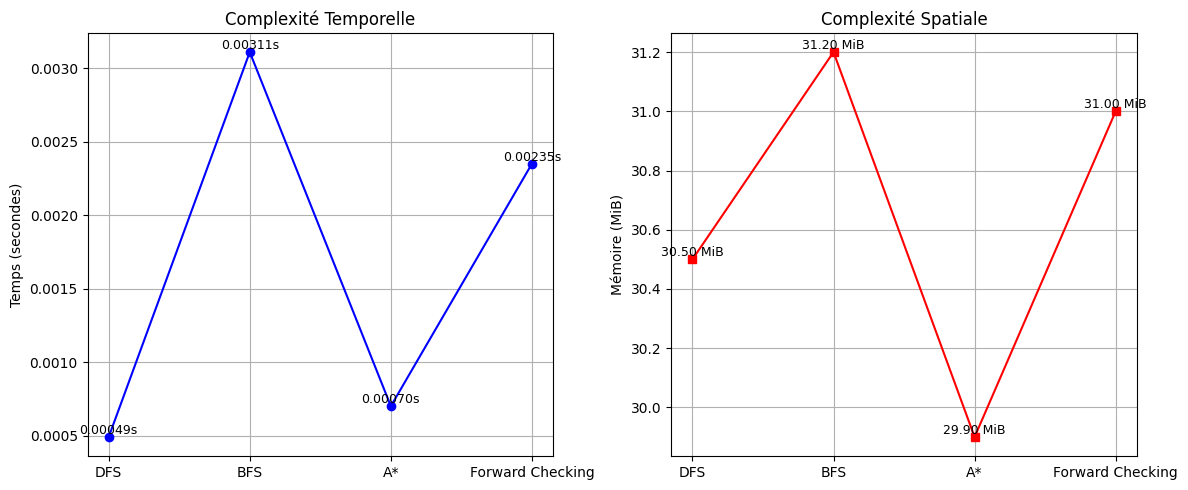

🔍 Interprétation comparative :
📉 Le plus rapide : DFS (0.00049 s)
🧠 Le plus économe en mémoire : A* (29.90 MiB)

📊 Détail complet des performances :
🔹 DFS → Temps: 0.00049 s | Mémoire: 30.50 MiB
🔹 BFS → Temps: 0.00311 s | Mémoire: 31.20 MiB
🔹 A* → Temps: 0.00070 s | Mémoire: 29.90 MiB
🔹 Forward Checking → Temps: 0.00235 s | Mémoire: 31.00 MiB


In [ ]:
import matplotlib.pyplot as plt

# Provided data for profiling the algorithms (time and memory)
results_profiled = [
    {"name": "DFS", "time": 0.00049, "memory": 30.5},
    {"name": "BFS", "time": 0.00311, "memory": 31.2},
    {"name": "A*", "time": 0.00070, "memory": 29.9},
    {"name": "Forward Checking", "time": 0.00235, "memory": 31.0}
]

# Extract names, times, and memory usage from the results
names = [res['name'] for res in results_profiled]
times = [res['time'] for res in results_profiled]
memories = [res['memory'] for res in results_profiled]

# Create subplots for plotting time and memory complexity
plt.figure(figsize=(12, 5))

# Plotting time complexity
plt.subplot(1, 2, 1)  # Create a subplot for time complexity
plt.plot(names, times, marker='o', linestyle='-', color='blue', label='Temps')  # Plot the times
# Annotate each point with its time value
for i, val in enumerate(times):
    plt.text(i, val, f"{val:.5f}s", ha='center', va='bottom', fontsize=9)
plt.title("Complexité Temporelle")  # Title of the plot
plt.ylabel("Temps (secondes)")  # Y-axis label
plt.grid(True)  # Enable grid

# Plotting memory complexity
plt.subplot(1, 2, 2)  # Create a subplot for memory complexity
plt.plot(names, memories, marker='s', linestyle='-', color='red', label='Mémoire')  # Plot the memory usage
# Annotate each point with its memory value
for i, val in enumerate(memories):
    plt.text(i, val, f"{val:.2f} MiB", ha='center', va='bottom', fontsize=9)
plt.title("Complexité Spatiale")  # Title of the plot
plt.ylabel("Mémoire (MiB)")  # Y-axis label
plt.grid(True)  # Enable grid

# Adjust layout to make the plots fit well
plt.tight_layout()

# Display the plots
plt.show()

# 🔍 Automatic Interpretation
# Find the algorithm with the shortest execution time
fastest = min(results_profiled, key=lambda x: x['time'])
# Find the algorithm that uses the least memory
most_efficient = min(results_profiled, key=lambda x: x['memory'])

# Print comparative analysis
print("🔍 Interprétation comparative :")
print(f"📉 Le plus rapide : {fastest['name']} ({fastest['time']:.5f} s)")  # Fastest algorithm
print(f"🧠 Le plus économe en mémoire : {most_efficient['name']} ({most_efficient['memory']:.2f} MiB)")  # Most memory-efficient algorithm

# 📊 Detailed performance data
print("\n📊 Détail complet des performances :")
for res in results_profiled:
    print(f"🔹 {res['name']} → Temps: {res['time']:.5f} s | Mémoire: {res['memory']:.2f} MiB")  # Display each algorithm's time and memory


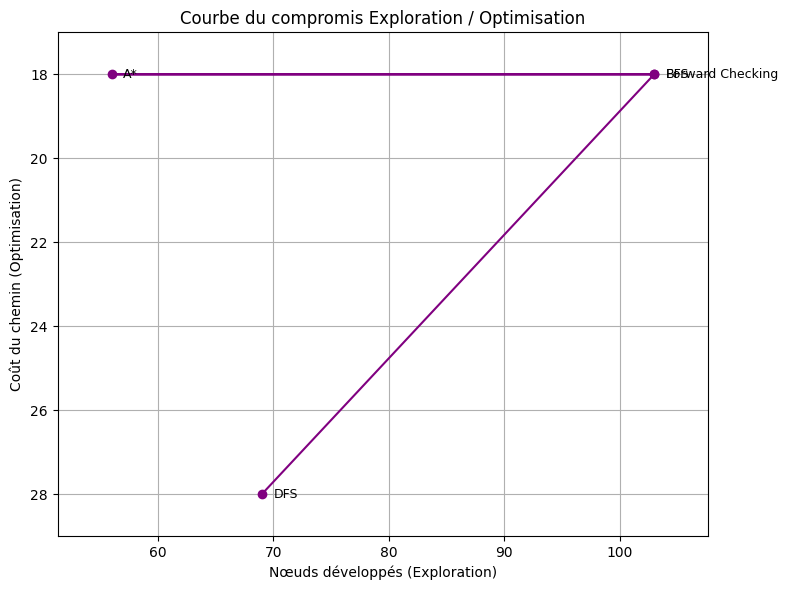

🔍 Analyse du compromis exploration/optimisation :
🏅 Le meilleur compromis est probablement : A* (seulement 56 nœuds, coût 18)

📊 Résumé :
🔹 DFS → Nœuds: 69 | Coût: 28
🔹 BFS → Nœuds: 103 | Coût: 18
🔹 A* → Nœuds: 56 | Coût: 18
🔹 Forward Checking → Nœuds: 103 | Coût: 18


In [ ]:
import matplotlib.pyplot as plt

# Données : Résultats détaillés pour chaque algorithme (nom, nombre de nœuds développés, coût du chemin)
results_detailed = [
    {"name": "DFS", "nodes": 69, "cost": 28},               # DFS (Depth-First Search)
    {"name": "BFS", "nodes": 103, "cost": 18},              # BFS (Breadth-First Search)
    {"name": "A*", "nodes": 56, "cost": 18},                # A* (A-star)
    {"name": "Forward Checking", "nodes": 103, "cost": 18}  # Forward Checking
]

# Extraction des données des résultats détaillés
names = [res["name"] for res in results_detailed]  # Liste des noms des algorithmes
nodes = [res["nodes"] for res in results_detailed]  # Liste des nœuds développés par chaque algorithme
costs = [res["cost"] for res in results_detailed]   # Liste des coûts de chaque algorithme

# Calcul des marges dynamiques pour ajuster les axes (ajouter de l'espace autour des données)
node_margin = (max(nodes) - min(nodes)) * 0.1  # Marge pour l'axe des nœuds (10% de l'écart)
cost_margin = (max(costs) - min(costs)) * 0.1  # Marge pour l'axe des coûts (10% de l'écart)

# Création du graphique
plt.figure(figsize=(8, 6))  # Taille de la figure (8x6 pouces)
plt.plot(nodes, costs, linestyle='-', marker='o', color='purple', label="Compromis")  # Tracer la courbe avec des marqueurs
for i in range(len(names)):  # Ajouter les étiquettes avec les noms des algorithmes à côté des points
    plt.text(nodes[i] + 1, costs[i], names[i], fontsize=9, verticalalignment='center')

# Ajouter des étiquettes et un titre
plt.xlabel("Nœuds développés (Exploration)")  # Étiquette de l'axe des x
plt.ylabel("Coût du chemin (Optimisation)")  # Étiquette de l'axe des y
plt.title("Courbe du compromis Exploration / Optimisation")  # Titre du graphique
plt.grid(True)  # Ajouter une grille pour faciliter la lecture des valeurs

# Ajuster les limites des axes avec les marges calculées
plt.xlim(min(nodes) - node_margin, max(nodes) + node_margin)  # Limites de l'axe des nœuds
plt.ylim(max(costs) + cost_margin, min(costs) - cost_margin)  # Limites de l'axe des coûts (inversé pour une meilleure visibilité)
plt.tight_layout()  # Ajuster les marges pour que tout s'affiche bien dans la fenêtre
plt.show()  # Afficher le graphique

# Interprétation des résultats
print("🔍 Analyse du compromis exploration/optimisation :")
# Trouver l'algorithme avec le meilleur compromis (minimum de nœuds et de coût)
best = min(results_detailed, key=lambda x: (x["nodes"], x["cost"]))
# Afficher l'algorithme avec le meilleur compromis
print(f"🏅 Le meilleur compromis est probablement : {best['name']} "
      f"(seulement {best['nodes']} nœuds, coût {best['cost']})")

# Afficher un résumé des résultats pour chaque algorithme
print("\n📊 Résumé :")
for res in results_detailed:
    print(f"🔹 {res['name']} → Nœuds: {res['nodes']} | Coût: {res['cost']}")
